# Setup

In [1]:
!rm -rf sample_data
!git clone https://github.com/elleryqueenhomels/arbitrary_style_transfer.git
!mv arbitrary_style_transfer/* . && rm -rf arbitrary_style_transfer

Cloning into 'arbitrary_style_transfer'...
remote: Enumerating objects: 231, done.
remote: Total 231 (delta 0), reused 0 (delta 0), pack-reused 231
Receiving objects: 100% (231/231), 6.70 MiB | 39.45 MiB/s, done.
Resolving deltas: 100% (100/100), done.


In [2]:
!mkdir content_images
!cd content_images && gdown https://drive.google.com/uc?id=1KVZZWS2O58KucRZ2lkR9kXgGySQGCg-w && unzip image.zip && rm image.zip

Downloading...
From: https://drive.google.com/uc?id=1KVZZWS2O58KucRZ2lkR9kXgGySQGCg-w
To: /content/content_images/image.zip
7.70MB [00:00, 68.0MB/s]
Archive:  image.zip
  inflating: CHICHI_0.jpg            
  inflating: LEO_0.jpg               
  inflating: LEO_1.jpg               
  inflating: LEO_2.jpg               
  inflating: LEO_3.jpg               
  inflating: LEON_0.jpg              
  inflating: LEON_1.jpg              
  inflating: LEON_2.jpg              
  inflating: WILLY&LEO.jpg           


In [3]:
!cd tool && bash ./download_trained_model.sh
!cd tool && bash ./download_vgg19.sh

--2020-10-29 11:41:46--  https://s3-us-west-2.amazonaws.com/wengaoye/arbitrary_style_model_style-weight-2e0.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.204.56
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.204.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59094122 (56M) [application/zip]
Saving to: ‘arbitrary_style_model_style-weight-2e0.zip’

arbitrary_style_mod 100%[===================>]  56.36M  26.4MB/s    in 2.1s    

2020-10-29 11:41:49 (26.4 MB/s) - ‘arbitrary_style_model_style-weight-2e0.zip’ saved [59094122/59094122]

Archive:  arbitrary_style_model_style-weight-2e0.zip
   creating: models/
  inflating: models/style_weight_2e0.ckpt.meta  
  inflating: models/style_weight_2e0.ckpt.index  
  inflating: models/style_weight_2e0.ckpt.data-00000-of-00001  
  inflating: models/info.txt         
  inflating: models/checkpoint       
  inflating: models/.DS_Store        
--2020-10-29 11:41:

In [4]:
!pip install tensorflow==2.2.0
!pip install scipy==1.0.0

     |████████████████████████████████| 516.2MB 31kB/s 
     |████████████████████████████████| 460kB 47.4MB/s 
     |████████████████████████████████| 3.0MB 46.5MB/s 
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0
     |████████████████████████████████| 50.0MB 63kB/s 
ERROR: umap-learn 0.4.6 has requirement scipy>=1.3.1, but you'll have scipy 1.0.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.0.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.0.0 which is incompatible.
ERROR: cvxpy 1.

In [5]:
! curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -
! echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list
! sudo apt-get update
! sudo apt-get install edgetpu-compiler	

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   653  100   653    0     0  36277      0 --:--:-- --:--:-- --:--:-- 36277
OK
deb https://packages.cloud.google.com/apt coral-edgetpu-stable main
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:3 https://packages.cloud.google.com/apt coral-edgetpu-stable InRelease [6,332 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learn

# Make it work in tensorflow 2.x

Before running the following cell, please change the import way of all .py file from
<pre>
import tensorflow as tf
</pre>
to 
<pre>
# import tensorflow as tf
import tensorflow.compat.v1 as tf
</pre>
and replace lines in `decoder.py` from
<pre>
            kernel = tf.get_variable(initializer=tf.contrib.layers.xavier_initializer(uniform=False), shape=shape, name='kernel')
            bias = tf.get_variable(initializer=tf.contrib.layers.xavier_initializer(uniform=False), shape=[output_filters], name='bias')
</pre>
to
<pre>
            kernel = tf.get_variable(initializer=tf.keras.initializers.RandomNormal(), shape=shape, name='kernel')
            bias = tf.get_variable(initializer=tf.keras.initializers.RandomNormal(), shape=[output_filters], name='bias')
</pre>


# Convert Encoder & Decoder to h5
modified from `infer.py`

In [6]:
import tensorflow as tf

from style_transfer_net import StyleTransferNet
from utils import get_images, save_images

contents_path = "/content/content_images/CHICHI_0.jpg"
styles_path = 'images/style/mosaic.jpg'
output_dir = "my_outputs"
encoder_path = 'vgg19_normalised.npz'
model_path = 'models/style_weight_2e0.ckpt'

from encoder import Encoder
from decoder import Decoder

if isinstance(contents_path, str):
    contents_path = [contents_path]
if isinstance(styles_path, str):
    styles_path = [styles_path]

with tf.compat.v1.Graph().as_default(), tf.compat.v1.Session() as sess:
    encoder = Encoder(encoder_path)
    decoder = Decoder()

    content_origin = tf.compat.v1.placeholder(
        tf.float32, shape=(1, 256, 256, 3), name='content')    
    # content = tf.reverse(content_origin, axis=[-1])
    content = encoder.preprocess(content_origin, mode="RGB")
    enc_c, _ = encoder.encode(content)

    features   = tf.compat.v1.placeholder(
            tf.float32, shape=(1, 32, 32, 512), name='features')

    generated_img = decoder.decode(features)
    generated_img = encoder.deprocess(generated_img, mode="RGB")
    # generated_img = tf.reverse(generated_img, axis=[-1])

    CONTENT_INPUT = tf.keras.Input(tensor=content_origin)
    FEATURES_INPUT = tf.keras.Input(tensor=features)

    sess.run(tf.compat.v1.global_variables_initializer())

    saver = tf.compat.v1.train.Saver()
    saver.restore(sess, model_path)

    model_ENCODER = tf.keras.Model(inputs=[CONTENT_INPUT], outputs=[enc_c])
    model_ENCODER.save("Encoder.h5")
    model_DECODER = tf.keras.Model(inputs=[FEATURES_INPUT], outputs=[generated_img])
    model_DECODER.save("Decoder.h5")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Restoring parameters from models/style_weight_2e0.ckpt


# Try Encoder and Decoder in Keras

In [7]:
import tensorflow as tf
enc = tf.keras.models.load_model('Encoder.h5')
dec = tf.keras.models.load_model('Decoder.h5')

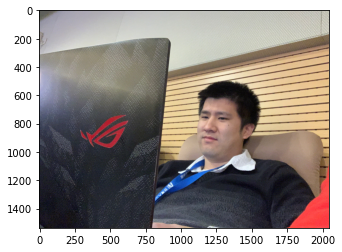

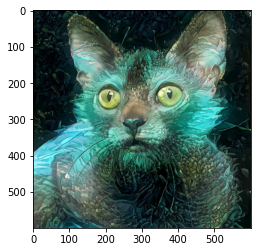

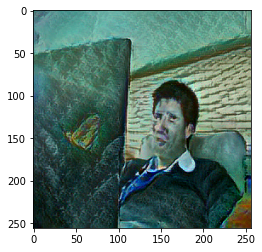

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

contents_path = "/content/content_images/CHICHI_0.jpg"
styles_path = '/content/images/style/cat.jpg'



def channel_mean_std(array, channels=[-2,-3], epsilon=1e-5):
  mean = array.copy()
  for c in channels:
    mean = mean.mean(axis=c, keepdims=True)
  
  var = array-mean
  for c in channels:
    var = var.mean(axis=c, keepdims=True)
  
  std = (var+epsilon)**.5
  return mean, std

# size 256x256
cont_img = cv2.imread(contents_path)[:,:,::-1] #rgb
plt.imshow(cont_img); plt.show()
cont_img = cv2.resize(cont_img, (256,256)).astype(np.float32)
cont_img = np.expand_dims(cont_img,0)

styl_img = cv2.imread(styles_path)[:,:,::-1]
plt.imshow(styl_img); plt.show()
styl_img = cv2.resize(styl_img, (256,256)).astype(np.float32)
styl_img = np.expand_dims(styl_img,0)

features_cont = enc.predict(cont_img)
cont_mean, cont_std = channel_mean_std(features_cont)
features_styl = enc.predict(styl_img)
styl_mean, styl_std = channel_mean_std(features_styl)

features_final = ((features_cont-cont_mean)/cont_std)*styl_std + styl_mean

pred = dec.predict(features_final)

to_show = pred[0].clip(0,255.0).astype(np.uint8)
plt.imshow(to_show); plt.show()

# Try multi style Transfer

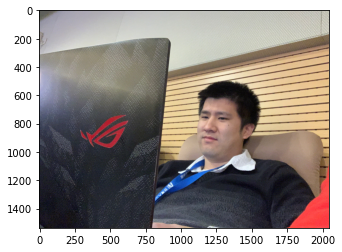

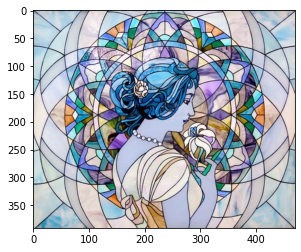

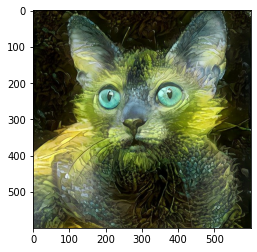

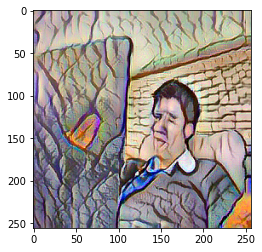

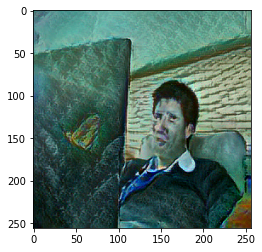

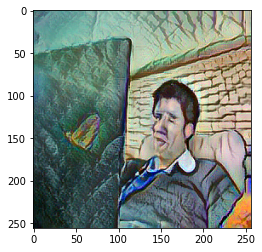

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain

contents_path = "/content/content_images/CHICHI_0.jpg"
style_paths = ['/content/images/style/mosaic.jpg',
               '/content/images/style/cat.jpg']

def channel_mean_std(array, channels=[-2,-3], epsilon=1e-5):
  mean = array.copy()
  for c in channels:
    mean = mean.mean(axis=c, keepdims=True)
  
  var = array-mean
  for c in channels:
    var = var.mean(axis=c, keepdims=True)
  
  std = (var+epsilon)**.5
  return mean, std

cont_img = cv2.imread(contents_path)[:,:,::-1]
plt.imshow(cont_img);plt.show()
cont_img = cv2.resize(cont_img, (256,256)).astype(np.float32)
cont_img = np.expand_dims(cont_img,0)

style_imgs=[]
for path in style_paths:
  styl_img = cv2.imread(path)[:,:,::-1]
  plt.imshow(styl_img[:,:,::-1]);plt.show()
  styl_img = cv2.resize(styl_img, (256,256)).astype(np.float32)
  styl_img = np.expand_dims(styl_img,0)
  style_imgs.append(styl_img)
style_imgs = np.concatenate(style_imgs, axis=0)


features_cont = enc.predict(cont_img)
cont_mean, cont_std = channel_mean_std(features_cont)
features_styl = enc.predict(style_imgs)
styl_mean, styl_std = channel_mean_std(features_styl)

x_proportion = np.linspace(0,1,features_cont.shape[1]).reshape(1,-1)
grid = np.ones((features_cont.shape[2],1)) @ x_proportion
grid = np.expand_dims(grid, axis=-1)


new_mean = styl_mean[0]*grid + styl_mean[1]*(1-grid)
new_std = styl_std[0]*grid + styl_std[1]*(1-grid)

features_final = ((features_cont-cont_mean)/cont_std)*styl_std + styl_mean
features_mix = ((features_cont-cont_mean)/cont_std)*new_std + new_mean

pred = dec.predict(features_final)
pred_mix = dec.predict(features_mix)

for p in chain(pred, pred_mix):
  to_show = p.clip(0,255.0).astype(np.uint8)
  plt.imshow(to_show)
  plt.show()

# Trying Costum Operator to Overcome Quantize Error Message

In [10]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Model
import numpy as np
import collections

## replace layer function

In [11]:
# https://stackoverflow.com/questions/49492255/how-to-replace-or-insert-intermediate-layer-in-keras-model
def replace_layer_nonseq(model, layer_substring_list, replace_layer_factory_list,
                         replace_layer_name=None, position='replace'):
    # Auxiliary dictionary to describe the network graph
    from collections import defaultdict
    network_dict = {'input_layers_of': defaultdict(list), 'new_output_tensor_of': defaultdict(list)}

    # Set the input layers of each layer
    for layer in model.layers:
        for node in layer._outbound_nodes:
            layer_name = node.outbound_layer.name
            if layer_name not in network_dict['input_layers_of']:
                network_dict['input_layers_of'].update(
                        {layer_name: [layer.name]})
            else:
                network_dict['input_layers_of'][layer_name].append(layer.name)

    # Set the output tensor of the input layer
    if isinstance(model.input, list):
      for _input in model.input:
        # import pdb;pdb.set_trace()
        sep = "_"
        drop = ":"
        _name = _input.name
        _name = _name.split(drop)[0]
        _name = sep.join(_name.split(sep)[:2])
        network_dict['new_output_tensor_of'].update(
                {_name: _input})
    else:
      network_dict['new_output_tensor_of'].update(
              {model.layers[0].name: model.input})

    # Iterate over all layers after the input
    model_outputs = []
    for layer in model.layers[:]:
        layer_name = layer.name
        print("*"*50)
        print(layer_name) #*****************
        # Determine input tensors
        layer_input = [network_dict['new_output_tensor_of'][layer_aux] 
                for layer_aux in network_dict['input_layers_of'][layer.name]]
        if len(layer_input)==0:
          print(layer,"has no input")
          continue
        elif len(layer_input) == 1:
            layer_input = layer_input[0]

        # Insert layer if name matches the regular expression
        
        index = -1
        for current_idx, substring in enumerate(layer_substring_list):
          if substring.lower() in layer.name.lower():
            index = current_idx
            break

        if index >= 0:
            replace_layer_factory = replace_layer_factory_list[index]
            if position == 'replace':
                x = layer_input
            elif position == 'after':
                x = layer(layer_input)
            elif position == 'before':
                pass
            else:
                raise ValueError('position must be: before, after or replace')

            
            new_layer = replace_layer_factory()
            if replace_layer_name:
                new_layer._name = replace_layer_name
            else:
                new_layer._name = '{}_{}'.format(layer.name, 
                                                new_layer.name)
            x = new_layer(x)
            print('New layer: {} Old layer: {} Type: {}'.format(new_layer.name,
                                                            layer.name, position))
            if position == 'before':
                x = layer(x)
        else:
            x = layer(layer_input)

        # Set new output tensor (the original one, or the one of the inserted
        # layer)
        network_dict['new_output_tensor_of'].update({layer.name: x})

        # Save tensor in output list if it is output in initial model
        if layer_name in model.output_names:
            model_outputs.append(x)
    print("*"*50)
    print("Done")
    return Model(inputs=model.inputs, outputs=model_outputs)

## my costum layer

In [12]:
class myPad(tf.keras.layers.Layer):
  def __init__(self, name="myPad"):
    uid = tf.keras.backend.get_uid(name)
    self.padding = tf.constant([[0,0], [1, 1,], [1, 1], [0,0]])
    super(myPad, self).__init__(name=name+f"_{uid}")
    
  def get_config(self):
    config = dict()
    return config
  
  def call(self, inputs):
    out = tf.pad(inputs, self.padding, "CONSTANT")
    return out

In [13]:
my_objects = {
    "myPad":myPad,
}

# re-define nonsupport layers

In [14]:
for h5_path in ["Encoder.h5", "Decoder.h5"]: 
  # h5_path = "Encoder.h5"
  dark_h5_path = "dark_"+h5_path

  model = tf.keras.models.load_model(h5_path)
  name_list = ["MirrorPad"]

  fun_list = [myPad]
  model = replace_layer_nonseq(model, layer_substring_list=name_list, replace_layer_factory_list=fun_list)
  model.save(dark_h5_path)

**************************************************
input_1
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f2555d44be0> has no input
**************************************************
tf_op_layer_sub
**************************************************
tf_op_layer_MirrorPad
New layer: tf_op_layer_MirrorPad_myPad_1 Old layer: tf_op_layer_MirrorPad Type: replace
**************************************************
tf_op_layer_Conv2D
**************************************************
tf_op_layer_BiasAdd
**************************************************
tf_op_layer_Relu
**************************************************
tf_op_layer_MirrorPad_1
New layer: tf_op_layer_MirrorPad_1_myPad_2 Old layer: tf_op_layer_MirrorPad_1 Type: replace
**************************************************
tf_op_layer_Conv2D_1
**************************************************
tf_op_layer_BiasAdd_1
**************************************************
tf_op_layer_Relu_1
****************************

In [15]:
h5_path = "Encoder.h5"
dark_h5_path = "dark_"+h5_path
redefined_encoder = keras.models.load_model(dark_h5_path,
                                custom_objects=my_objects,
                                )
h5_path = "Decoder.h5"
dark_h5_path = "dark_"+h5_path
redefined_decoder = keras.models.load_model(dark_h5_path,
                                custom_objects=my_objects,
                                )

# Convert Encoder to tflite

In [17]:
import glob
import cv2
model_name_quantize = "dark_Encoder.tflite"
model_name = "dark_Encoder.h5"

take = 10
files_path = glob.glob("images/content/*.jpg")
def encoder_gen(target_shape = (256,256)):
  for path in files_path[:take]:
    image = cv2.imread(path)
    image = cv2.resize(image, target_shape)
    image = image.astype(np.float32)
    image = np.expand_dims(image, axis=0)
    yield [image]
gen = encoder_gen

model = keras.models.load_model(model_name, custom_objects=my_objects)
# change input shape (batch to 1)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

converter.representative_dataset = gen
tflite_model = converter.convert()

open(model_name_quantize, 'wb').write(tflite_model)

3582592

In [18]:
!edgetpu_compiler -s {model_name_quantize}

Edge TPU Compiler version 14.1.317412892

Model compiled successfully in 292 ms.

Input model: dark_Encoder.tflite
Input size: 3.42MiB
Output model: dark_Encoder_edgetpu.tflite
Output size: 3.52MiB
On-chip memory used for caching model parameters: 3.36MiB
On-chip memory remaining for caching model parameters: 2.41MiB
Off-chip memory used for streaming uncached model parameters: 64.00B
Number of Edge TPU subgraphs: 1
Total number of operations: 24
Operation log: dark_Encoder_edgetpu.log

Model successfully compiled but not all operations are supported by the Edge TPU. A percentage of the model will instead run on the CPU, which is slower. If possible, consider updating your model to use only operations supported by the Edge TPU. For details, visit g.co/coral/model-reqs.
Number of operations that will run on Edge TPU: 22
Number of operations that will run on CPU: 2

Operator                       Count      Status

DEQUANTIZE                     1          Operation is working on an unsu

# Convert Decoder to tflite

In [19]:
import glob
model_name_quantize = "dark_Decoder.tflite"
model_name = "dark_Decoder.h5"

# take = 10
files_path = glob.glob("images/content/*.jpg")
def decoder_gen(enc):
  prev_gen = encoder_gen()
  for img in prev_gen:
    code = enc(img)
    yield [code]
gen = lambda:decoder_gen(redefined_encoder)

model = keras.models.load_model(model_name, custom_objects=my_objects)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

converter.representative_dataset = gen
tflite_model = converter.convert()

open(model_name_quantize, 'wb').write(tflite_model)

3564816

In [20]:
!edgetpu_compiler -s {model_name_quantize}

Edge TPU Compiler version 14.1.317412892

Model compiled successfully in 187 ms.

Input model: dark_Decoder.tflite
Input size: 3.40MiB
Output model: dark_Decoder_edgetpu.tflite
Output size: 3.43MiB
On-chip memory used for caching model parameters: 3.32MiB
On-chip memory remaining for caching model parameters: 2.58MiB
Off-chip memory used for streaming uncached model parameters: 0.00B
Number of Edge TPU subgraphs: 1
Total number of operations: 23
Operation log: dark_Decoder_edgetpu.log

Model successfully compiled but not all operations are supported by the Edge TPU. A percentage of the model will instead run on the CPU, which is slower. If possible, consider updating your model to use only operations supported by the Edge TPU. For details, visit g.co/coral/model-reqs.
Number of operations that will run on Edge TPU: 16
Number of operations that will run on CPU: 7

Operator                       Count      Status

RESIZE_NEAREST_NEIGHBOR        1          Operation is otherwise supported

# Try inference them on tpu

In [21]:
# move *.tflite to your inference machine
!zip model.zip *Decoder* *Encoder*

  adding: dark_Decoder_edgetpu.log (deflated 65%)
  adding: dark_Decoder_edgetpu.tflite (deflated 9%)
  adding: dark_Decoder.h5 (deflated 57%)
  adding: dark_Decoder.tflite (deflated 8%)
  adding: Decoder.h5 (deflated 57%)
  adding: dark_Encoder_edgetpu.log (deflated 59%)
  adding: dark_Encoder_edgetpu.tflite (deflated 26%)
  adding: dark_Encoder.h5 (deflated 59%)
  adding: dark_Encoder.tflite (deflated 24%)
  adding: Encoder.h5 (deflated 59%)


In [22]:
from google.colab import files
files.download("model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>